> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

For this project I will be analysing the <b>No Show Appointment</b> dataset. This dataset indicates if individuals made it to an appointment or not and list out some certain factors that apply to the individuals. Below are the column names in this dataset as well as their meaning

<ol>
    <b>Patient ID</b>: way to identify each patient
</ol>
<ol>
    <b>Appointment ID</b>: way to identify each appointment
</ol>
<ol>
    <b>Gender</b>: Male or Female
</ol>
<ol>
    <b>ScheduledDay</b>: Day of the appointment
</ol>
<ol>
    <b>Age</b>: Age of the patient
</ol>
<ol>
    <b>Neighbourhood</b>: Location of the Hospital
</ol>
<ol>
    <b>Scholarship</b>:is the patient enrolled in Brasilian welfare program Bolsa Família.
</ol>
<ol>
    <b>Hypertension</b>: does the patient have hypertension?
</ol>
<ol>
    <b>Diabetes</b>: Does the patient have diabetes?
</ol>
<ol>
    <b>Alcoholism</b>: Is the patient addicted to alcohol
</ol>
<ol>
    <b>Handcap</b>: Is the patient handicapped?
</ol>
<ol>
    <b>SMS_recieved</b>: number of reminder sms received by patient
</ol>
<ol>
    <b>No-show</b>: Did the patient not sure up? No means the patient showed up and Yes means they did not show up
</ol>

### Questions

For this dataset, its analysis will be done to answer the following questions:

1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

2. Are patients with some form of sickness likely to go their set appointment

3. What period of time(month) have the most no-show appointments

4. What age group makes it to all their appointments

5. Which neighbourhood(hospital location) has the least amount of noshow appointment

6. gender effect

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from platform import python_version

print(python_version())

3.9.12


In [3]:
def plotter(data,kind):
    if kind == 'bar':
        return data.value_counts().plot(kind='bar');
    elif kind == 'hist':
        return data.hist(figsize=(15,10));
    
def multiplotter(labels,data1,data2):
    x = np.arange(len(labels))
    y1 = data1
    y2 = data2
    width = 0.2
    fig,ax = plt.subplots(figsize = (15,10))
    nd = ax.bar(x-width/2,y1,width,label='Show')
    yd = ax.bar(x+width/2,y2,width,label='Noshow')
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(nd, padding=3)
    ax.bar_label(yd, padding=3)

    fig.tight_layout()


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshow.csv')

In [5]:
# view the top rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# view the bottom rows of the dataset
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [7]:
# see how many rows and columns are in the dataset
df.shape

(110527, 14)

In [8]:
# see basic show_nbrmation on the dataset and confirm if any null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# extra confirmation if there are any null values within the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [10]:
# get summary statistics on the dataset, adding 'include="all"' to include non-number columns in the summary
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [11]:
#check for duplicates in the dataset
sum(df.duplicated())

0

Insights from dataset review

1. Renaming certain columns for ease of analysis
2. Columns containing datetime information are stored as strings and will need to be converted to datetime
3. Extract the month from the dates for further analysis
4. PatientID and AppointmentId are not needed and can be dropped
5. From the summary statistics, in the age column I noticed that the min is -1 which is not valid. Will need to query for rows whose age is less than zero(0) so that they can be dropped and not affect the analysis


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

##### Rename No-show to no_show and Hipertension to Hypertension for consistency

In [12]:
df.rename(columns={'No-show':'no_show','Hipertension':'Hypertension'},inplace=True)

##### create new columns which is the month from the scheduled and appointment date

In [13]:
df['sd_month'] = pd.to_datetime(df['ScheduledDay'].str.slice(0, 10)).dt.month
df['ad_month'] = pd.to_datetime(df['AppointmentDay'].str.slice(0, 10)).dt.month

In [14]:
# look at the data to ensure that new columns were created as intended
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,sd_month,ad_month
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


##### Drop columns that are no longer needed

In [15]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [16]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,sd_month,ad_month
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


##### check for columns which have age less than 0

In [17]:
df[df['Age']<0]

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,sd_month,ad_month
99832,F,-1,ROMÃO,0,0,0,0,0,0,No,6,6


##### proceeding to drop this row found

In [18]:
to_drop = df[df['Age']<0].index
df.drop(to_drop,axis=0,inplace=True)

In [19]:
#confirm that there are no rows again with age less than 0
df[df['Age']<0]

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,sd_month,ad_month


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.



### General exploration

Before examining the columns in detail, a general examination will be done on the dataset

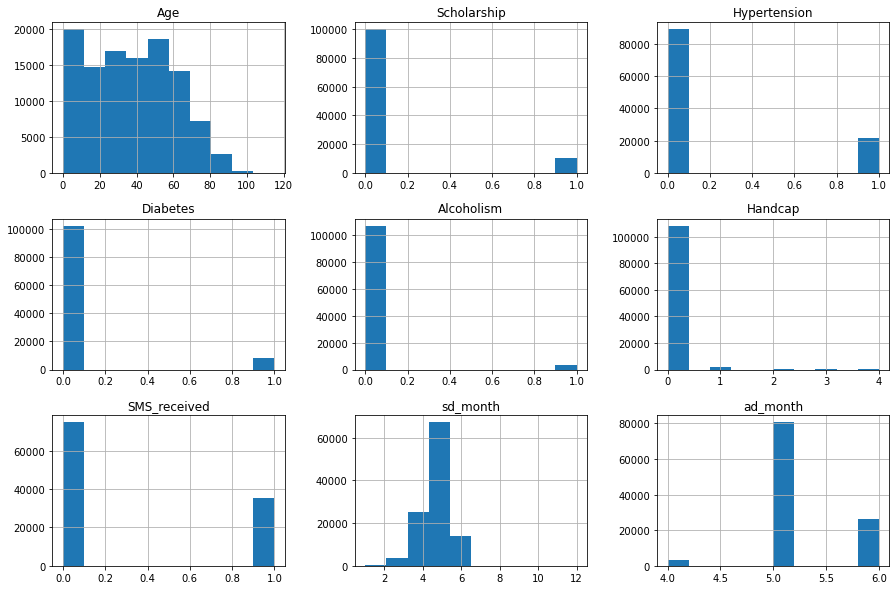

In [20]:
#df.hist(figsize=(15,10));
plotter(df,'hist')
plt.show()

In [21]:
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

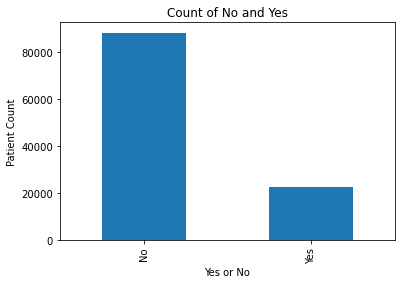

In [22]:
# visual look at the how many patients show for their appointment and how many do not

plotter(df['no_show'],'bar')
plt.title('Count of No and Yes')
plt.xlabel('Yes or No')
plt.ylabel('Patient Count')
plt.show()

The bar chart above depicts for this dataset, there is an overwhelming large number of patients who actually show up to their appointments

##### For better investigation and comparison, two datasets were created from the major dataset
###### 1. show_df: dataset with patients that showed for up for their appointments(no_show == 'no')
###### 2. noshow_df: dataset with patients that did not show up for their appointments(no_show == 'yes)

In [23]:
show_df = df.query("no_show == 'No'")
noshow_df = df.query("no_show == 'Yes'")

In [24]:
show_df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,sd_month,ad_month
count,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000
mean,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,4.881778,5.215017
std,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751,0.454381,0.696983,0.477268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,12.000000,6.000000


In [25]:
show_df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,sd_month,ad_month
count,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000,88207.000000
mean,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,4.881778,5.215017
std,23.338645,0.291697,0.403261,0.261508,0.171733,0.162751,0.454381,0.696983,0.477268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,5.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,12.000000,6.000000


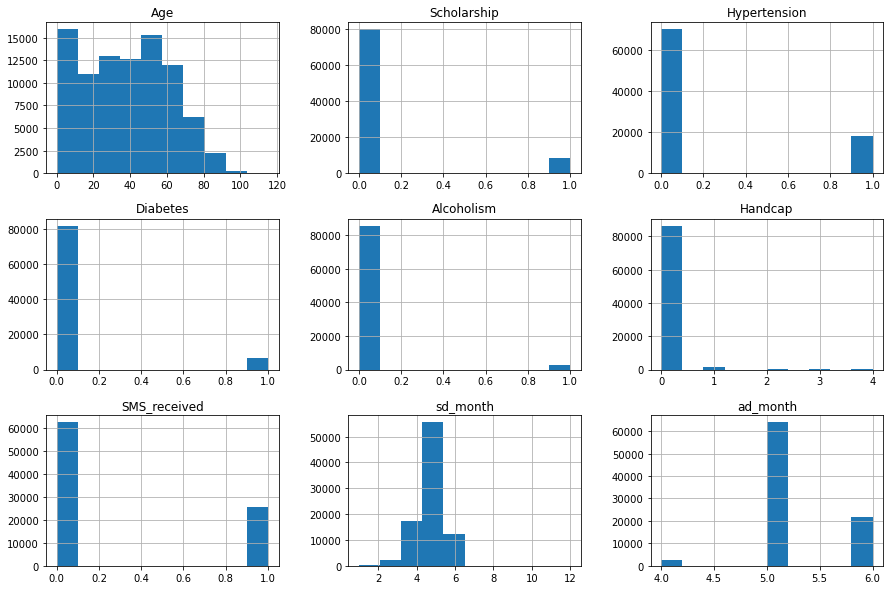

In [26]:
plotter(show_df,'hist')
plt.show()

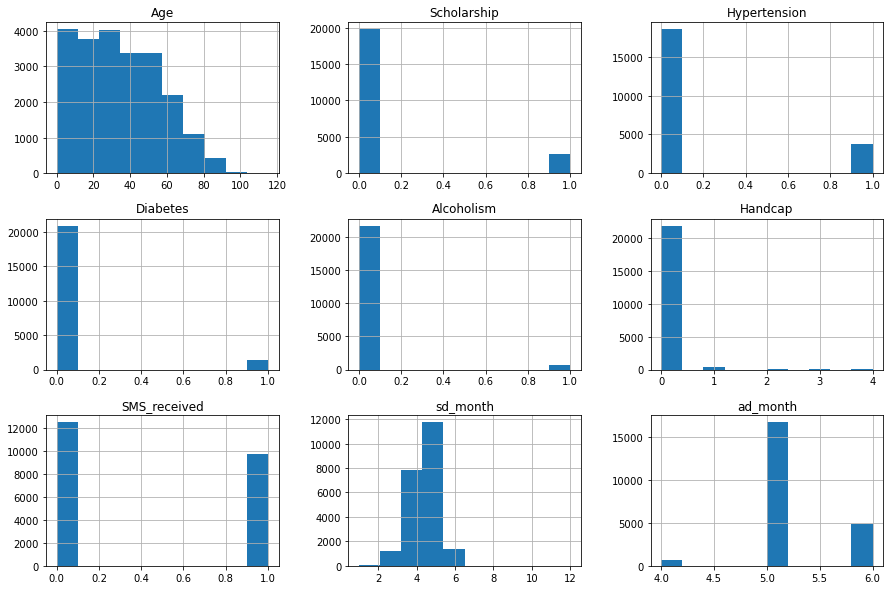

In [27]:
plotter(noshow_df,'hist')
plt.show()

From the histograms of the 2 new datasets created, we can there a lot of similarity and that for all variables the number of patients that showed up to their appointment is more that amount that did not show up to their appointments

### Age group
#### <i>What age group makes it to all their appointments?</i>

For the section, the ages within the dataset will be investigated to see if there is a relationship between the a group of ages and showing up to appointments

In [28]:
# grouping the whole dataset by the no_show column and looking at the age section
df.groupby('no_show')['Age'].count()

no_show
No     88207
Yes    22319
Name: Age, dtype: int64

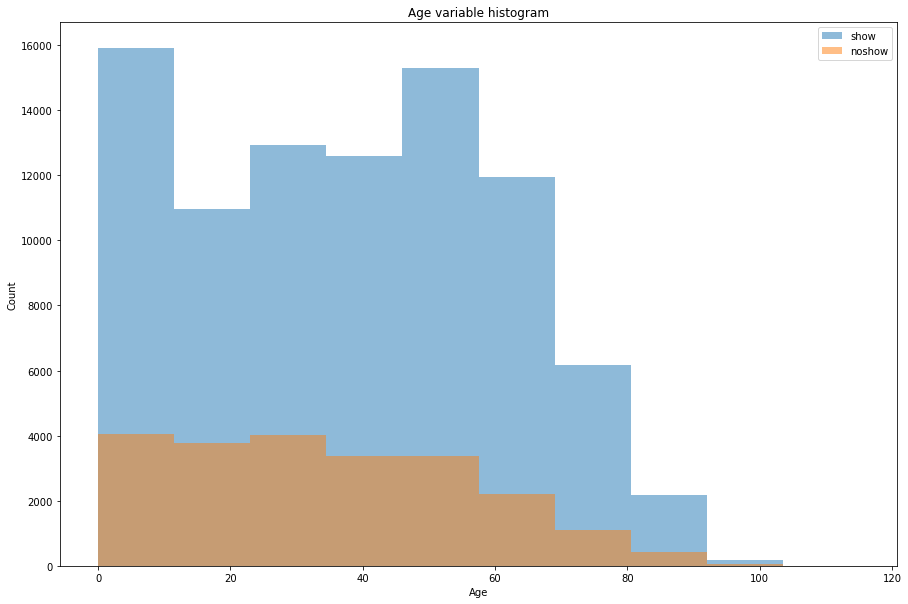

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
ax.hist(show_df['Age'],alpha=0.5,label='show')
ax.hist(noshow_df['Age'],alpha=0.5,label='noshow')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age variable histogram')
plt.legend()
plt.show()

The visualisation for the age variable shows that the for both show and noshow data, it is skewed to the right. As the charts are identical, it is uncertain that the age of the patient determines if the patient shows up for the appointment or not

### Gender
#### For this section, the gender of the patients will be aanalysed to see if patients not showing to appointments are particular to a gender type

In [30]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

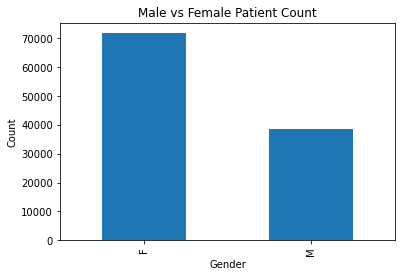

In [31]:
plotter(df['Gender'],'bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Male vs Female Patient Count')
plt.show()

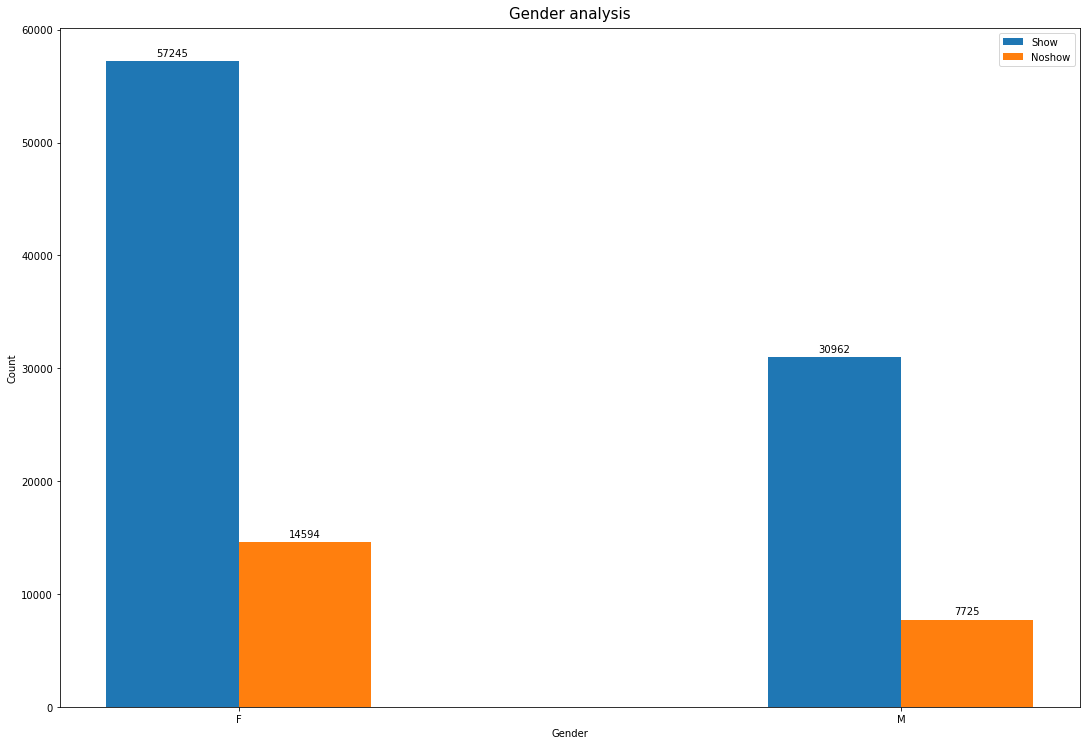

In [32]:
#plotting the bar charts of the noshow and show datasets next to each other to visualy look at it and draw insights

labels = ['F', 'M']
x1 = show_df['Gender'].value_counts()
x2 = noshow_df['Gender'].value_counts()
multiplotter(labels,x1,x2)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender analysis',fontsize=15,pad=10)

plt.show()

From the gender analysis and visualisation, just like the age column, there seems to be no exact correlation as with the high number of female clients in the datasets, females are more likely to make their appointment just as much as they are likely to miss their appointment

### Neigbourhood

In [33]:
# taking note of the number of neighourhoods in the dataset

df['Neighbourhood'].nunique()

81

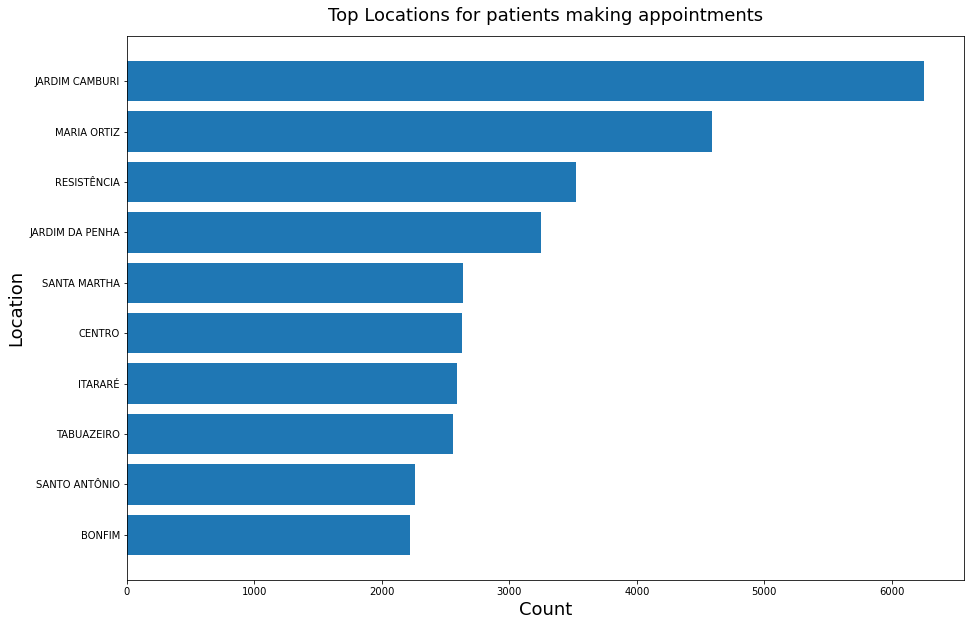

In [34]:
#plot graph to look at the top locations where patients have made it to their appointment

show_nb = show_df.groupby('Neighbourhood')['no_show'].value_counts().to_frame(name='count')
show_nb.reset_index(inplace=True)
show_nb.set_index('Neighbourhood',inplace=True)
show_nb.drop('no_show',axis=1,inplace=True)
show_nb.sort_values('count',ascending=False,inplace=True)

plt.figure(figsize=(15,10))
x1 = show_nb['count'][9::-1].values
y1 = show_nb.index[9::-1]
plt.barh(y1,x1)
plt.xlabel('Count',fontsize=18)
plt.ylabel('Location',fontsize=18)
plt.title('Top Locations for patients making appointments',fontsize=18,pad=15)

plt.show()

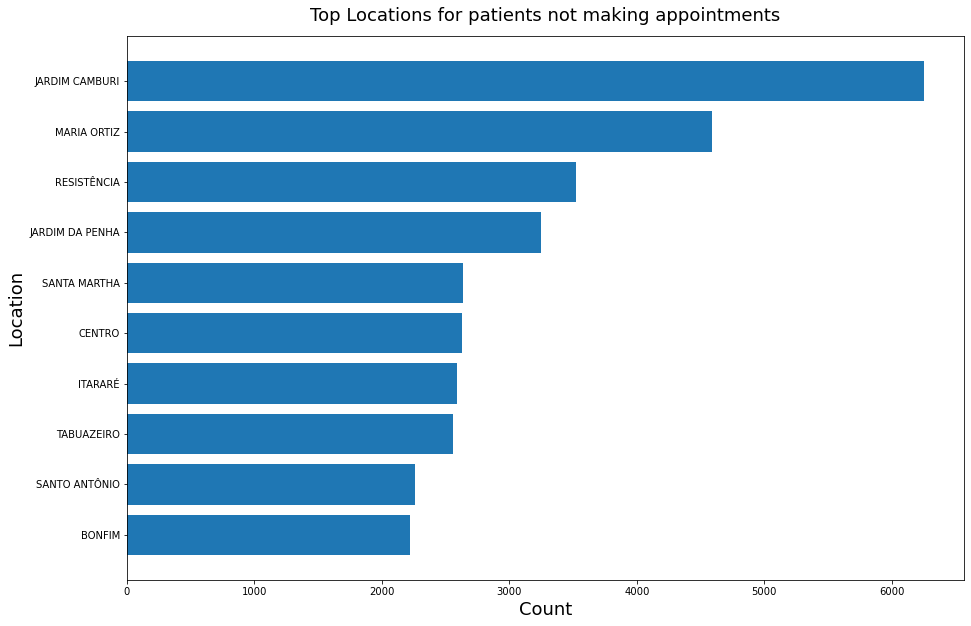

In [35]:
#plot graph to look at the top locations where patients did not make it to their appointment

noshow_nb = noshow_df.groupby('Neighbourhood')['no_show'].value_counts().to_frame(name='count')
noshow_nb.reset_index(inplace=True)
noshow_nb.set_index('Neighbourhood',inplace=True)
noshow_nb.drop('no_show',axis=1,inplace=True)
noshow_nb.sort_values('count',ascending=False,inplace=True)

plt.figure(figsize=(15,10))
x1 = show_nb['count'][9::-1].values
y1 = show_nb.index[9::-1]
plt.barh(y1,x1)
plt.xlabel('Count',fontsize=18)
plt.ylabel('Location',fontsize=18)
plt.title('Top Locations for patients not making appointments',fontsize=18,pad=15)

plt.show()

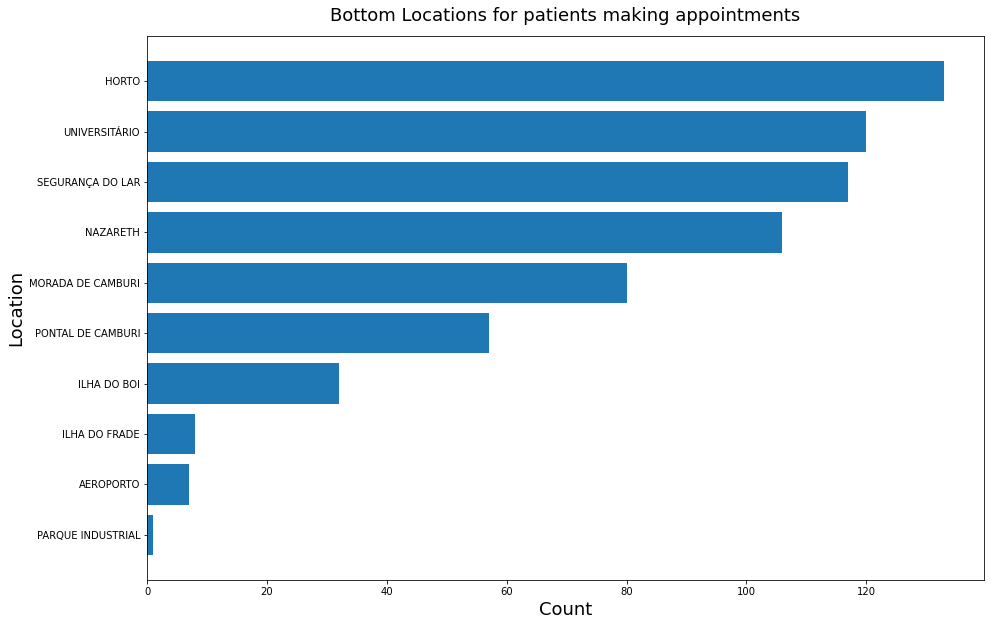

In [36]:
#plot graph to look at the bottom locations where patients have made it to their appointment

show_nb = show_df.groupby('Neighbourhood')['no_show'].value_counts().to_frame(name='count')
show_nb.reset_index(inplace=True)
show_nb.set_index('Neighbourhood',inplace=True)
show_nb.drop('no_show',axis=1,inplace=True)
show_nb.sort_values('count',ascending=False,inplace=True)

plt.figure(figsize=(15,10))
x2 = show_nb['count'][80:69:-1].values
y2 = show_nb.index[80:69:-1]
plt.barh(y2,x2)
plt.xlabel('Count',fontsize=18)
plt.ylabel('Location',fontsize=18)
plt.title('Bottom Locations for patients making appointments',fontsize=18,pad=15)

plt.show()

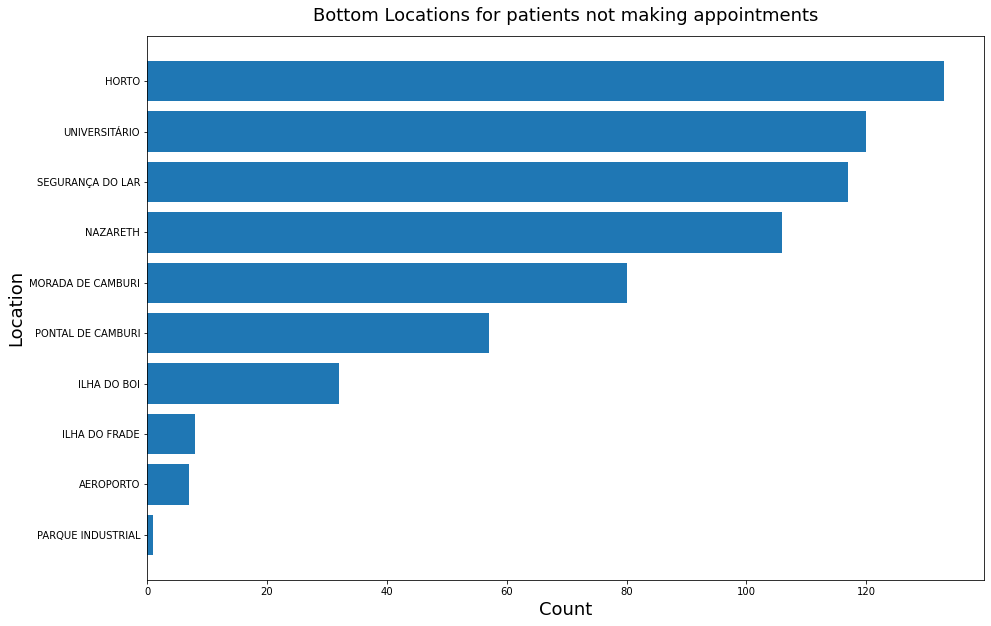

In [37]:
#plot graph to look at the top locations where patients did not make it to their appointment

noshow_nb = noshow_df.groupby('Neighbourhood')['no_show'].value_counts().to_frame(name='count')
noshow_nb.reset_index(inplace=True)
noshow_nb.set_index('Neighbourhood',inplace=True)
noshow_nb.drop('no_show',axis=1,inplace=True)
noshow_nb.sort_values('count',ascending=False,inplace=True)

plt.figure(figsize=(15,10))
x1 = show_nb['count'][80:69:-1].values
y1 = show_nb.index[80:69:-1]
plt.barh(y1,x1)
plt.xlabel('Count',fontsize=18)
plt.ylabel('Location',fontsize=18)
plt.title('Bottom Locations for patients not making appointments',fontsize=18,pad=15)

plt.show()

Analysis of the Neigbourhood column shows it does not have an effect on the no_show column, hence one cannot explicitely say a patient that booked a hospital in a particular region is going to show up or not show up as the same locations for top and bottom are the same for show and noshow datasets

### Alcoholism, Diabetes and Hypertension

This part of the investigation will if these ailments are related to one another and also if there is a combination of them that leads to patients not showing to appointments or the opposite

In [38]:
ailment = df.groupby(['Alcoholism', 'Diabetes', 'Hypertension'])['no_show']
ailment.describe()

count unique top   freq
Alcoholism Diabetes Hypertension                         
0          0        0             85311      2  No  67473
                    1             14244      2  No  11811
           1        0              1381      2  No   1105
                    1              6230      2  No   5135
1          0        0              1957      2  No   1537
                    1              1071      2  No    873
           1        0                76      2  No     63
                    1               256      2  No    210

In [39]:
ailment_show = show_df.groupby(['Alcoholism', 'Diabetes', 'Hypertension'])['no_show']
ailment_show = ailment_show.describe().sort_values('count')['count'].to_frame('count')

In [40]:
ailment_show

count
Alcoholism Diabetes Hypertension       
1          1        0                63
                    1               210
           0        1               873
0          1        0              1105
1          0        0              1537
0          1        1              5135
           0        1             11811
                    0             67473

In [41]:
ailment_noshow = noshow_df.groupby(['Alcoholism', 'Diabetes', 'Hypertension'])['no_show']
ailment_noshow = ailment_noshow.describe().sort_values('count')['count'].to_frame('count')

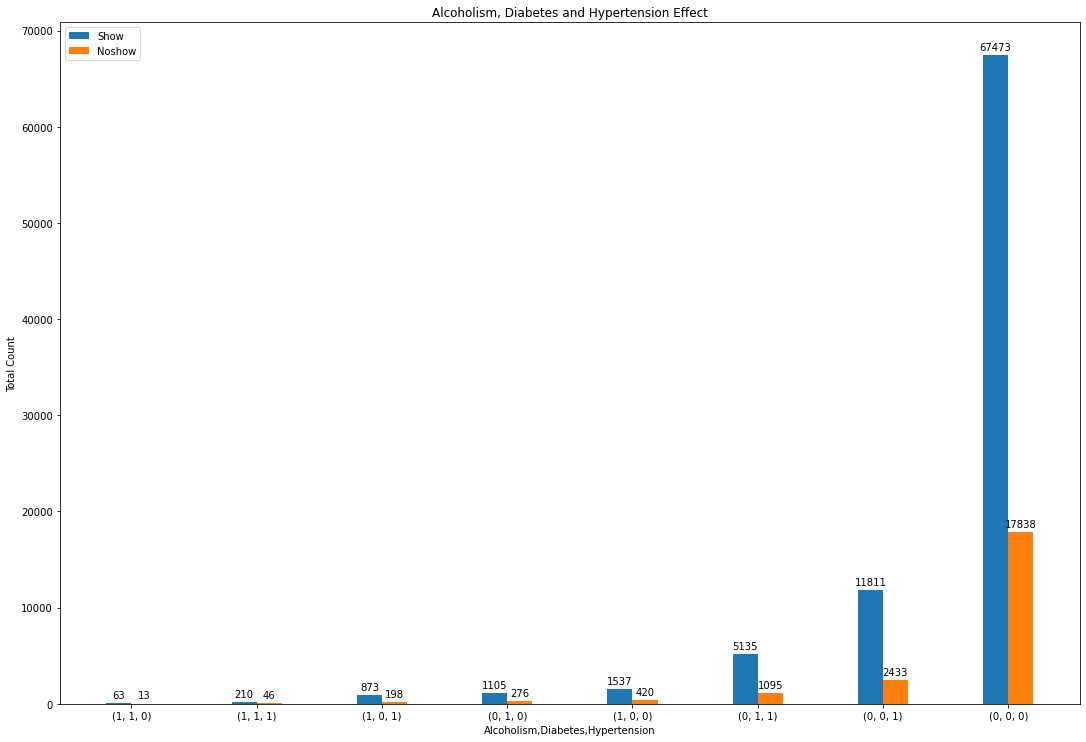

In [42]:
#plot the graph showing the number of patients that attend and do not attend based on a number of columns combined

labels = ailment_show.index.to_list()
x1 = ailment_show['count']
x2 = ailment_noshow['count']
multiplotter(labels,x1,x2)
plt.title('Alcoholism, Diabetes and Hypertension Effect')
plt.xlabel('Alcoholism,Diabetes,Hypertension')
plt.ylabel('Total Count')

plt.show()

### Brief look at the month columns created using a time series

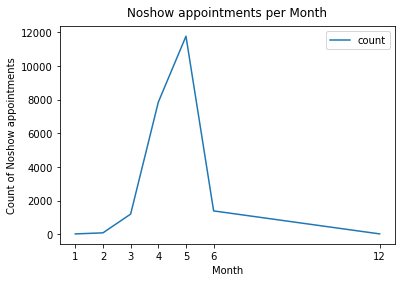

In [43]:
#plot line chart for noshow dataset
noshow_line = noshow_df.groupby('sd_month')['no_show'].value_counts().to_frame('count')
noshow_line.reset_index(inplace=True)
noshow_line.set_index('sd_month',inplace=True)
noshow_line.drop('no_show',axis=1,inplace=True)
noshow_line.plot(kind='line')
plt.xticks(noshow_line.index)
plt.xlabel('Month')
plt.ylabel('Count of Noshow appointments')
plt.title('Noshow appointments per Month', pad=10)
plt.show()

#analysis below

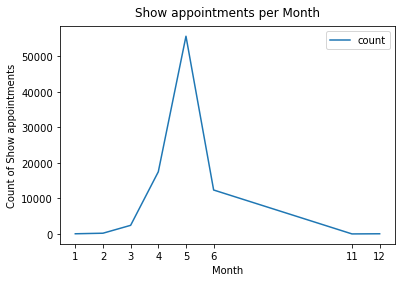

In [44]:
#plot line chart for show dataset

show_line = show_df.groupby('sd_month')['no_show'].value_counts().to_frame('count')
show_line.reset_index(inplace=True)
show_line.set_index('sd_month',inplace=True)
show_line.drop('no_show',axis=1,inplace=True)
show_line.plot(kind='line')
plt.xticks(show_line.index)
plt.xlabel('Month')
plt.ylabel('Count of Show appointments')
plt.title('Show appointments per Month', pad=10)
plt.show()

From the two(2) line charts above it is observed that a high number of appointments are made between the 4th and 5th month in particular and in that aspect, we can see that the number of patients that do not show up to their appointments likew the number of patients that do show up to their appointments increase

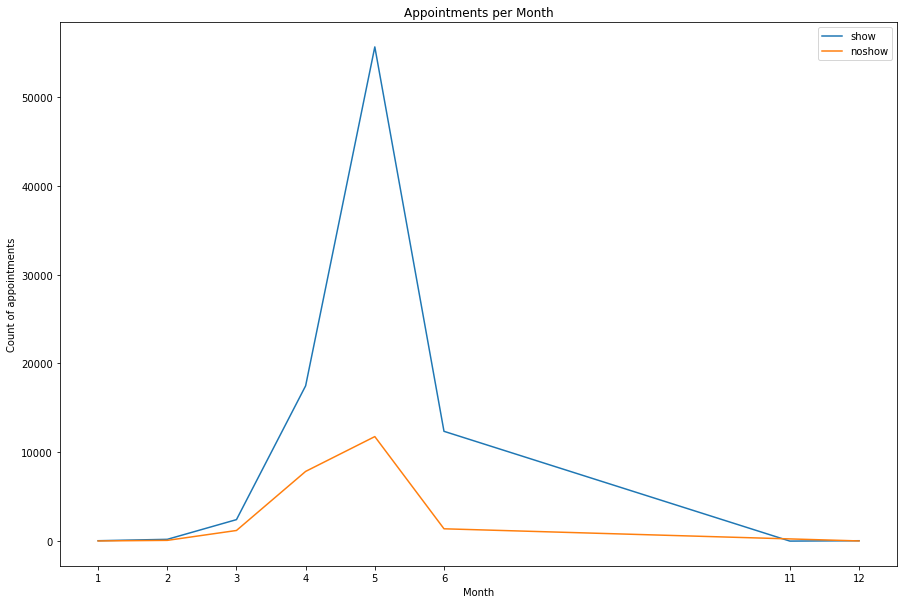

In [45]:
#plotting two line charts at the same time to see the clear difference and if the trend is the same for noshow and show datasets

fig,ax = plt.subplots(figsize=(15,10))
ax.plot(show_line.index,show_line['count'],label='show')
ax.plot(noshow_line.index,noshow_line['count'],label='noshow')
plt.xlabel('Month')
plt.ylabel('Count of appointments')
plt.title('Appointments per Month')
plt.xticks(show_line.index)
plt.legend()
plt.show()

By plotting the two line charts together, one can see how the number of patients that show and not show up follow the same pattern. Noticabely, it seem that at the 11th month, the number of noshow patients go above the number of show patients. This will require more investigation and confirmation.

<a id='conclusions'></a>
## Conclusions

<b>Results:</b> From the investigation, we can infer from the data that:

1. Unable to specifically identify any variable that greatly affects the reason for patients to not show up for their appointments. 
2. With the combination of some variables (grouping them together) in this case Alcoholism, Diabetes and Hypertension, was still unable to identify the variable which has the most impact.
3. There is a large disparity between the patients that attended their appointments to the patients that did not make/attend it as the ratio is approximately 4:1. This then means that with the greater amount of patients attending their appointments, there is no variable where the number of patients that do not attend is greater or close to the number of patients that attend. 
4. Noticed from the line chart that during the 11th month, we see the number of noshow patients go higher than the number of show patients

<b>Limitations:</b> Below are some of the limitations within the data

1. The no_show column was left as categorical data (No, Yes)
2. Huge disparity between the number of patients that make their appointments compared to the number of patients that do not make it
3. Not all factors/attributes have been analysed

<b>Future/additional comments:</b>

<p>Possible ways to resolve this include:</p>
1. Taking a sample of the patients that made their appointment that is equivalent to the number of patients that did not show up to their appointment
2. Investigating only the part of the data that had the no_show column as yes(noshow_df) 
3. Performing more variable combination for example age with hypertension



<a id='references'></a>
### References

Below are the list of sites I viewed to use to perform this project

1. https://pandas.pydata.org/docs/index.html#
2. https://matplotlib.org/stable/index.html
3. https://www.w3schools.com/ 